<a href="https://colab.research.google.com/github/kavya22115/Predictive_Analytics/blob/Student_Admission_Prediction/Studentadmissionprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Performance:
Linear Regression: MSE = 0.0037, R2 = 0.8188
Ridge Regression: MSE = 0.0037, R2 = 0.8188
Random Forest: MSE = 0.0043, R2 = 0.7875
Gradient Boosting: MSE = 0.0044, R2 = 0.7826
Support Vector Regressor: MSE = 0.0049, R2 = 0.7589
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for Random Forest: {'regressor__max_features': 0.6, 'regressor__min_samples_leaf': 4, 'regressor__n_estimators': 150}
Best R-squared for Random Forest (Cross-validation): 0.7964
Optimized Random Forest MSE on Test Set: 0.0039
Optimized Random Forest R-squared on Test Set: 0.8106


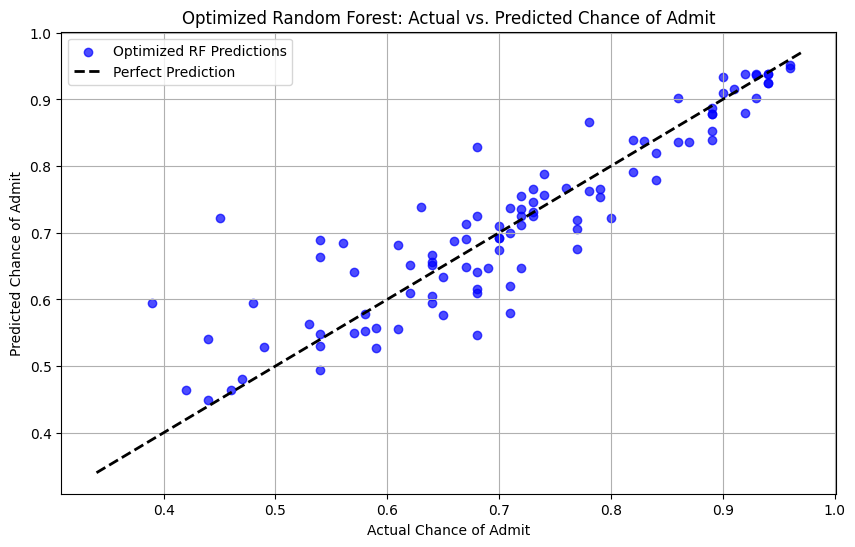


New student profile:
   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0        320          110                  4  4.0  4.0   9.0         1
Predicted Chance of Admit (Optimized Random Forest): 0.82


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

df = pd.read_csv('Admission_Predict_Ver1.1.csv')

df.drop('Serial No.', axis=1, inplace=True)
df.columns = df.columns.str.strip()

X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Pipelines for different models with scaling and potential feature engineering ---

# Linear Regression Pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Ridge Regression Pipeline (with regularization)
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Random Forest Regressor Pipeline
pipeline_rf = Pipeline([
    ('regressor', RandomForestRegressor(random_state=42))
])

# Gradient Boosting Regressor Pipeline
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()), # Often beneficial for boosting, though not strictly necessary
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Support Vector Regressor Pipeline
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SVR())
])

pipelines = {
    'Linear Regression': pipeline_lr,
    'Ridge Regression': pipeline_ridge,
    'Random Forest': pipeline_rf,
    'Gradient Boosting': pipeline_gb,
    'Support Vector Regressor': pipeline_svr
}

results = {}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")

# --- Hyperparameter Tuning Example (using GridSearchCV for Random Forest) ---
param_grid_rf = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_features': [0.6, 0.8, 1.0],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print("Best R-squared for Random Forest (Cross-validation):", f"{grid_search_rf.best_score_:.4f}")
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest MSE on Test Set: {mse_best_rf:.4f}")
print(f"Optimized Random Forest R-squared on Test Set: {r2_best_rf:.4f}")

# --- Visualize Best Model Predictions ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7, color='blue', label='Optimized RF Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Optimized Random Forest: Actual vs. Predicted Chance of Admit")
plt.legend()
plt.grid(True)
plt.show()

# --- Example Prediction with Best Model ---
new_student_data = pd.DataFrame([[320, 110, 4, 4.0, 4.0, 9.0, 1]],
                                  columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'])

# Use the best pipeline for prediction
predicted_chance_best_rf = best_rf_model.predict(new_student_data)[0]
predicted_chance_best_rf_clipped = np.clip(predicted_chance_best_rf, 0, 1)

print(f"\nNew student profile:\n{new_student_data}")
print(f"Predicted Chance of Admit (Optimized Random Forest): {predicted_chance_best_rf_clipped:.2f}")